In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from clulib import allowed_energies, parse_data, draw_energy_spectrum

In [32]:
matplotlib.rcParams['font.size'] = 14

## Convert text to numpy (skip if already done)

In [3]:
data_path = './Data'
for energy in allowed_energies():
    pione, pitwo, picount = parse_data('pi0', energy, data_path)
    gaone, _, gacount = parse_data('gamma', energy, data_path)
    np.savez(f'./npy/e{energy}', gaone=gaone, pione=pione, pitwo=pitwo)
    print(pione.shape[0], pitwo.shape[0], gaone.shape[0])

1652 74293 99077
35205 61005 99020
28584 71270 98878
16423 83559 98474
10870 89128 98011
11491 88508 97718
29301 70698 97334
52239 47760 97003
66768 33231 96544
74627 25372 96124
79389 20610 95913
82575 17424 95629
84836 15163 87076
82891 13088 80048


In [4]:
counts = np.array([
    [1652, 74293, 99077],
    [35205, 61005, 99020],
    [28584, 71270, 98878],
    [16423, 83559, 98474],
    [10870, 89128, 98011],
    [11491, 88508, 97718],
    [29301, 70698, 97334],
    [52239, 47760, 97003],
    [66768, 33231, 96544],
    [74627, 25372, 96124],
    [79389, 20610, 95913],
    [82575, 17424, 95629],
    [84836, 15163, 87076],
    [82891, 13088, 80048],
])

In [39]:
n1 = counts[:, 0]
s1 = np.sqrt(n1)
n1, s1 = [item / (n1 + n2) for item in [n1, s1]]
energy = np.array(allowed_energies()) / 10**3

In [40]:
print(n1)
s1

[0.02175258 0.3659183  0.28625794 0.16425957 0.10870217 0.11491115
 0.29301293 0.52239522 0.66768668 0.74627746 0.79389794 0.82575826
 0.84836848 0.86363684]


array([0.00053519, 0.00195021, 0.00169315, 0.00128175, 0.00104261,
       0.00107197, 0.00171177, 0.00228561, 0.00258398, 0.00273182,
       0.00281763, 0.00287362, 0.00291269, 0.0029997 ])

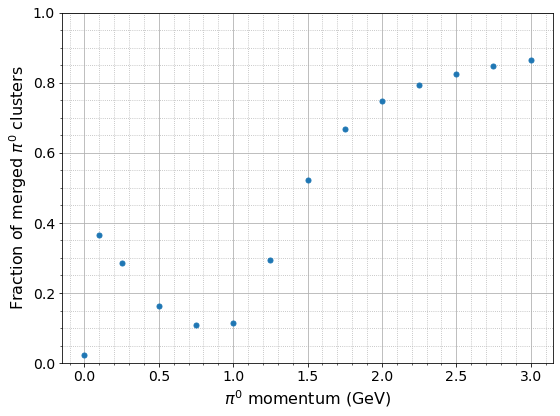

In [44]:
plt.figure(figsize=(8, 6))
plt.errorbar(energy, n1, yerr=s1, linestyle='none', marker='o', markersize=5)
plt.xlabel(r'$\pi^0$ momentum (GeV)', fontsize=16)
plt.ylabel(r'Fraction of merged $\pi^0$ clusters', fontsize=16)
plt.ylim((0, 1))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig('plots/merged_clusters_fraction.png')